PRUEBA CON LOS PONDS

In [10]:
#cargamos la imágen
import imageio as imageio
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image 


In [78]:
im1 = imageio.imread('ponds.bmp')


C:\Users\Margarita Zerpa\AppData\Local\Temp\ipykernel_18776\429905463.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im1 = imageio.imread('ponds.bmp')


In [12]:
# Normalizar los valores de RGB del pixel: dividir los valores 0 a 255 por 255
#para obtener valores en el rango de 0 a 1. (no se usa)
def normalize_rgb(img):
    return np.clip(img /255.,0.,1.)

In [16]:
def lineal_a_tarzos(yiq,ymin,ymax):
    yiq[:, :, 0][yiq[:, :, 0] < ymin] = 0
    yiq[:, :, 0][yiq[:, :, 0] > ymax] = 1
    return yiq

In [17]:
#Chequear que Y’ <= 1 (para que no se vaya de rango)
#Chequear -0.5957 < I’ < 0.5957 y -0.5226 < Q’ < 0.5226
def check_yiq(yiq):
    yiq[:, :, 0] = np.clip(yiq[:, :, 0], 0, 1)  # Asegura que Y' esté en [0, 1]
    yiq[:, :, 1] = np.clip(yiq[:, :, 1], -0.5957, 0.5957)# Asegura que I' esté en [-0.5957, 0.5957]
    yiq[:, :, 2] = np.clip(yiq[:, :, 2], -0.5226, 0.5226)# Asegura que Q' esté en [-0.5226, 0.5226]
    return yiq

In [18]:
def RGB_to_YIQ(rgb):
    yiq = np.zeros(rgb.shape)
    yiq[:, :, 0] = 0.229 * rgb[:, :, 0] + 0.587 * rgb[:, :, 1] + 0.114 * rgb[:, :, 2]
    yiq[:, :, 1] = 0.595716 * rgb[:, :, 0] - 0.274453 * rgb[:, :, 1] - 0.321263 * rgb[:, :, 2]
    yiq[:, :, 2] = 0.211456 * rgb[:, :, 0] - 0.522591 * rgb[:, :, 1] + 0.311135 * rgb[:, :, 2]
    return yiq

In [19]:
def YIQ_to_RGB(yiq):
    rgb = np.zeros(yiq.shape)
    rgb[:, :, 0] = yiq[:, :, 0] + 0.9663 * yiq[:, :, 1] + 0.6210 * yiq[:, :, 2]
    rgb[:, :, 1] = yiq[:, :, 0] - 0.2721 * yiq[:, :, 1] - 0.6474 * yiq[:, :, 2]
    rgb[:, :, 2] = yiq[:, :, 0] - 1.1070 * yiq[:, :, 1] + 1.7046 * yiq[:, :, 2]
    return rgb

In [65]:
def mostrar_imagen_y_histograma(imagen, histograma, bins):
    # Crear una figura con dos subtramas
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Subtrama 1: Mostrar la imagen
    ax1.imshow(imagen)
    ax1.set_title("Imagen Normalizada")

    # Subtrama 2: Mostrar el histograma
    ax2.bar(bins[:-1], histograma, width=0.1, align='center', alpha=0.5)
    ax2.set_title("Histograma")
    ax2.set_xlabel("Valor de píxel normalizado")
    ax2.set_ylabel("Frecuencia")
    ax2.set_xticks(bins[:-1])
    ax2.grid(True)

    # Ajustar el espacio entre las subtramas
    plt.tight_layout()

    # Mostrar la figura
    plt.show()


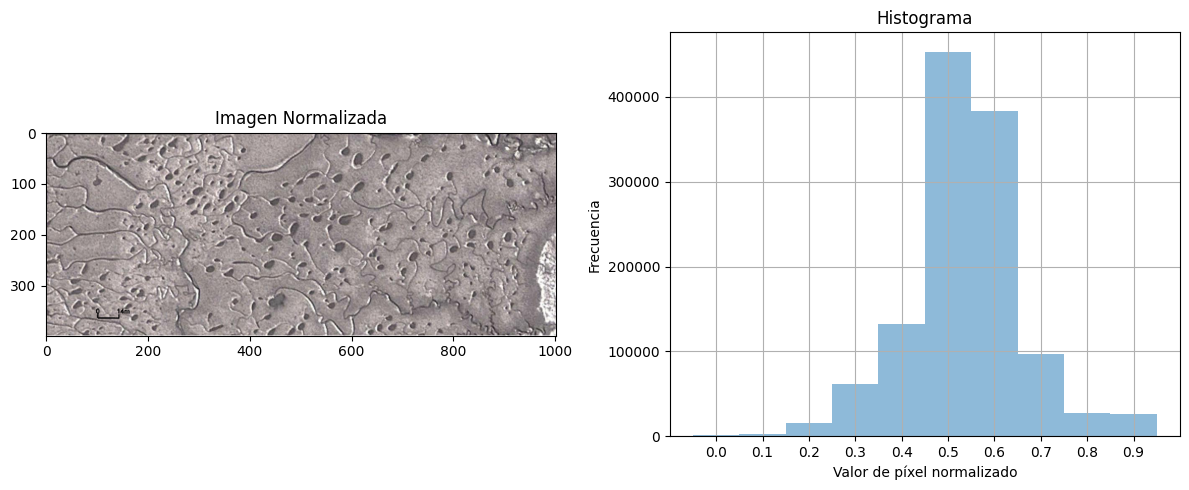

In [79]:
#VISUALIZAMOS IMAGEN ORIGINAL Y SU HISTOGRAMA
imagenNormalizada=normalize_rgb(im1)

# Genera un histograma con 10 columnas
histogram, bins = np.histogram(imagenNormalizada.flatten(), bins=10, range=(0, 1))

# Suponiendo que ya tienes 'imagenNormalizada' y 'histogram' definidos
mostrar_imagen_y_histograma(imagenNormalizada, histogram, bins)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


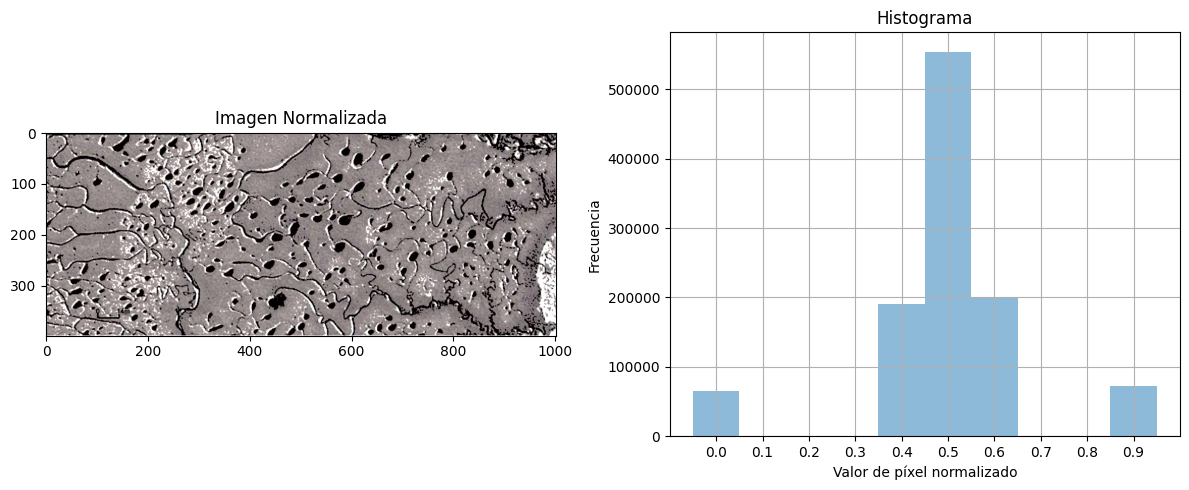

In [77]:
yiq = RGB_to_YIQ(imagenNormalizada)
imagen_binarizada= lineal_a_tarzos(yiq,0.43,0.67)
imagenProcesada=YIQ_to_RGB(imagen_binarizada)

# mostrar imagen procesada y visualizamos su histograma
histogram1, bins1 = np.histogram(imagenProcesada.flatten(), bins=10, range=(0, 1))
mostrar_imagen_y_histograma(imagenProcesada, histogram1, bins1)